<a href="https://colab.research.google.com/github/ravali217/logistic-regression/blob/main/ml_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/CarPrice_Assignment.csv'
dataset=pd.read_csv(path)
print("Dataset Preview")
print(dataset.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Preview
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4       

1.load the dataset and identify the relevant columns
2. use: engine size as input
car price as output
3. visualise the relationship between engine size and price

In [128]:
print(dataset[['enginesize', 'price']].head())


   enginesize    price
0         130  13495.0
1         130  16500.0
2         152  16500.0
3         109  13950.0
4         136  17450.0


In [129]:
X = dataset['enginesize']   # Input feature
y = dataset['price']        # Output variable
print(X)
print("====")
print(y)

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: enginesize, Length: 205, dtype: int64
====
0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


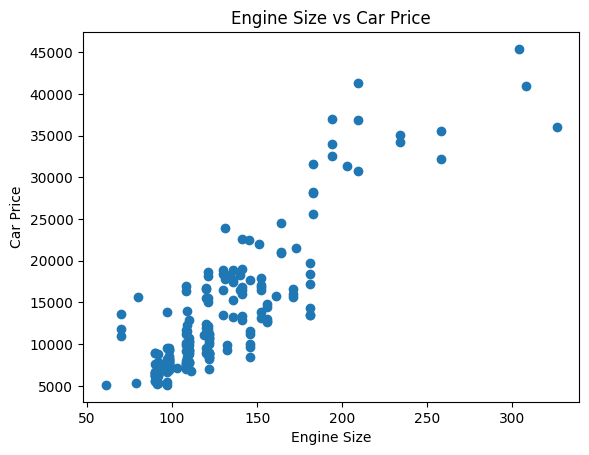

In [130]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X, y)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price")
plt.show()


4. build a predictive model to estimate car price based on engine size
5. predict the price for a car with: engine size=200
6. increase the flexibility of your model and observe how the curve changes.
7. compare predictions from:
a simple straight-line model
a curved model
8. analyze which model:
captures the trend better
gives more realistic predictions
9. evaluate predictions errors and interpret them in business terms

In [131]:
print(X.isnull().sum())
print(y.isnull().sum())


0
0


In [132]:
X = X.fillna(X.mean())
y = y.fillna(y.mean())



In [133]:
from sklearn.linear_model import LinearRegression

# Select input and output
X = dataset[['enginesize']]   # Input feature (2D)
y = dataset['price']          # Output variable

# Create and train the model
linear_model = LinearRegression()
linear_model.fit(X, y)

print("Model trained successfully!")



Model trained successfully!


In [134]:
linear_model.predict([[200]])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25534.23774749])

In [135]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train the polynomial model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)


LinearRegression()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


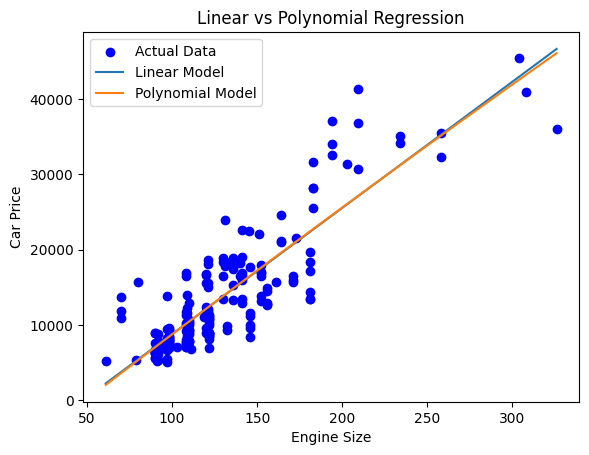

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Create smooth engine size values
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Predictions
y_linear = linear_model.predict(X_range)
y_poly = poly_model.predict(poly.transform(X_range))

# Plot
plt.figure()
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_range, y_linear, label='Linear Model')
plt.plot(X_range, y_poly, label='Polynomial Model')
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


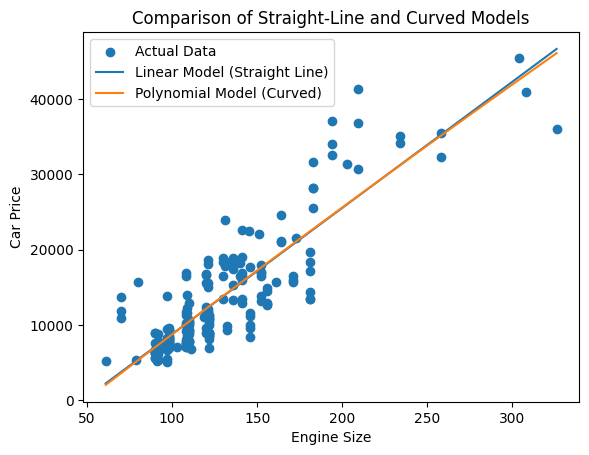

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Create smooth engine size values
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
# Straight-line model predictions
y_linear = linear_model.predict(X_range)

# Curved (polynomial) model predictions
y_poly = poly_model.predict(poly.transform(X_range))

plt.figure()
plt.scatter(X, y, label="Actual Data")
plt.plot(X_range, y_linear, label="Linear Model (Straight Line)")
plt.plot(X_range, y_poly, label="Polynomial Model (Curved)")
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Comparison of Straight-Line and Curved Models")
plt.legend()
plt.show()


In [138]:
from sklearn.metrics import mean_absolute_error

linear_mae = mean_absolute_error(y, linear_model.predict(X))
poly_mae = mean_absolute_error(y, poly_model.predict(X_poly))

linear_mae, poly_mae


(2815.022353836411, 2809.772875118241)

Linear Model MAE: 2815.022353836411
Polynomial Model MAE: 2809.772875118241


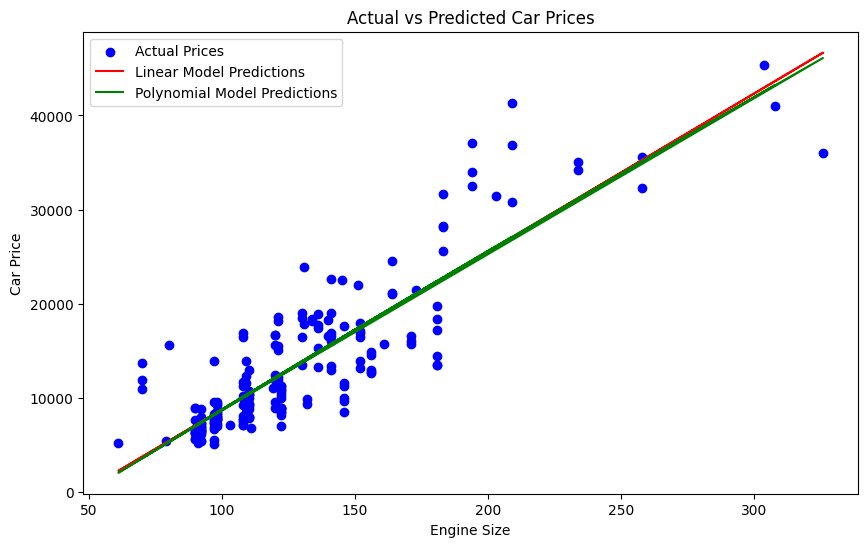

Average prediction error (Linear Model): ₹2815.02
Average prediction error (Polynomial Model): ₹2809.77

Business interpretation:
- MAE of ~₹2800 means predicted price can differ by this much from actual price
- Overpricing may reduce sales; underpricing may reduce profits
- Polynomial model slightly better, but engine size alone is not enough for production pricing


In [139]:
from sklearn.metrics import mean_absolute_error
# Linear Regression predictions
y_pred_linear = linear_model.predict(X)

# Polynomial Regression predictions
y_pred_poly = poly_model.predict(X_poly)
# Mean Absolute Error
linear_mae = mean_absolute_error(y, y_pred_linear)
poly_mae = mean_absolute_error(y, y_pred_poly)

print("Linear Model MAE:", linear_mae)
print("Polynomial Model MAE:", poly_mae)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Actual Prices')
plt.plot(X, y_pred_linear, color='red', label='Linear Model Predictions')
plt.plot(X, y_pred_poly, color='green', label='Polynomial Model Predictions')
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.show()
print(f"Average prediction error (Linear Model): ₹{linear_mae:.2f}")
print(f"Average prediction error (Polynomial Model): ₹{poly_mae:.2f}")

print("\nBusiness interpretation:")
print("- MAE of ~₹2800 means predicted price can differ by this much from actual price")
print("- Overpricing may reduce sales; underpricing may reduce profits")
print("- Polynomial model slightly better, but engine size alone is not enough for production pricing")





/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


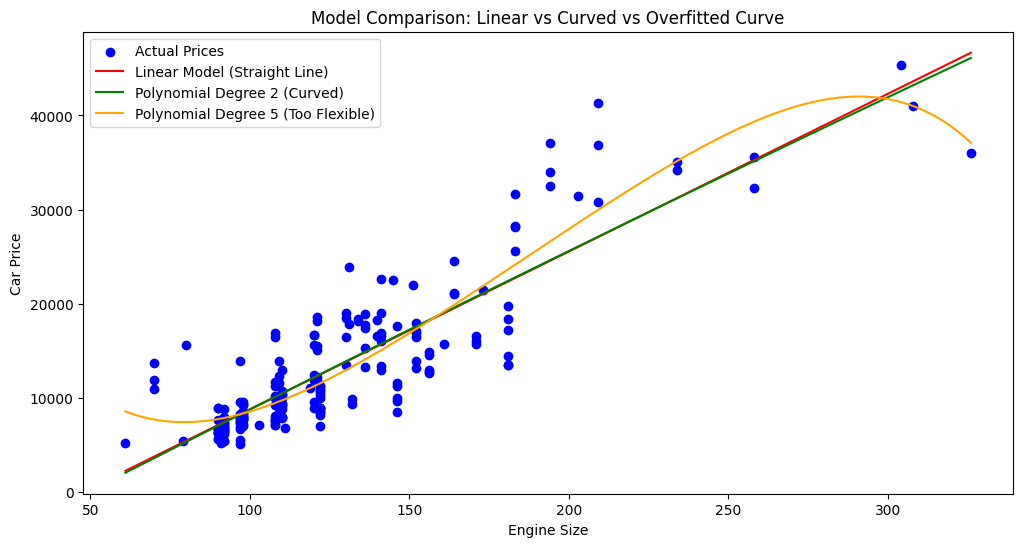

Linear Model MAE: 2815.022353836411
Polynomial Degree 2 MAE: 2809.772875118241
Polynomial Degree 5 MAE: 2673.365064222654


In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

# Input and output
X = dataset[['enginesize']].astype(float)
y = dataset['price'].astype(float)

# Straight-line (Linear) Model
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Flexible Curve (Polynomial degree 2)
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)
poly_model2 = LinearRegression()
poly_model2.fit(X_poly2, y)
y_pred_poly2 = poly_model2.predict(X_poly2)

# Very Flexible Curve (Polynomial degree 5 - to show overfitting risk)
poly5 = PolynomialFeatures(degree=5)
X_poly5 = poly5.fit_transform(X)
poly_model5 = LinearRegression()
poly_model5.fit(X_poly5, y)
y_pred_poly5 = poly_model5.predict(X_poly5)

# Plot all models
X_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_linear_range = linear_model.predict(X_range)
y_poly2_range = poly_model2.predict(poly2.transform(X_range))
y_poly5_range = poly_model5.predict(poly5.transform(X_range))

plt.figure(figsize=(12,6))
plt.scatter(X, y, color='blue', label='Actual Prices')
plt.plot(X_range, y_linear_range, color='red', label='Linear Model (Straight Line)')
plt.plot(X_range, y_poly2_range, color='green', label='Polynomial Degree 2 (Curved)')
plt.plot(X_range, y_poly5_range, color='orange', label='Polynomial Degree 5 (Too Flexible)')
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Model Comparison: Linear vs Curved vs Overfitted Curve")
plt.legend()
plt.show()

# Evaluate errors
linear_mae = mean_absolute_error(y, y_pred_linear)
poly2_mae = mean_absolute_error(y, y_pred_poly2)
poly5_mae = mean_absolute_error(y, y_pred_poly5)

print("Linear Model MAE:", linear_mae)
print("Polynomial Degree 2 MAE:", poly2_mae)
print("Polynomial Degree 5 MAE:", poly5_mae)


In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [142]:
x=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y=np.array([0,0,0,0,1,1,1,1,1,1])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [143]:
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [144]:
y_pred=model.predict(x_test)
print("predictions:",y_pred)

predictions: [1 0]


In [145]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 1.0


In [146]:
print("/n classification report:",classification_report(y_test,y_pred))

/n classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



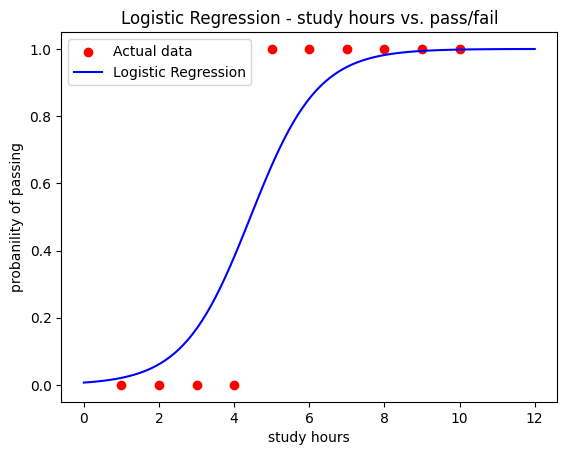

In [147]:
x_range=np.linspace(0,12,100).reshape(-1,1)
y_prob=model.predict_proba(x_range)[:,-1]
plt.scatter(x,y,color="red",label="Actual data")
plt.plot(x_range,y_prob,color="blue",label="Logistic Regression")
plt.xlabel("study hours")
plt.ylabel("probanility of passing")
plt.title("Logistic Regression - study hours vs. pass/fail")
plt.legend()
plt.show()

In [148]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[1 0]
 [0 1]]


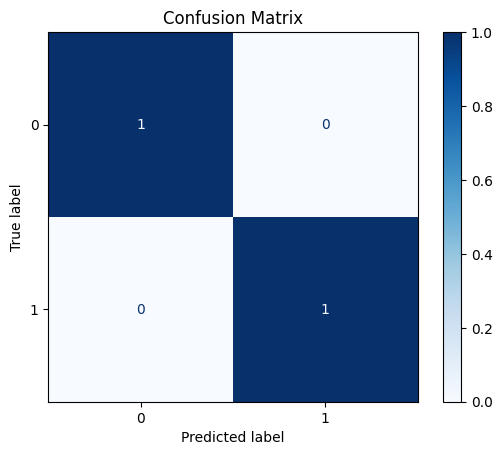

In [149]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap="Blues", values_format="d"
)
plt.title("Confusion Matrix")
plt.show()

In [150]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
path='/content/drive/MyDrive/heart.csv'
df=pd.read_csv(path)
print("Dataset Preview")
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Preview
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [151]:
from sklearn.preprocessing import StandardScaler

x=df.drop("target",axis=1)
y=df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [152]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [153]:
y_pred=model.predict(x_test)
print("predictions:",y_pred)

predictions: [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]


In [154]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7804878048780488


In [155]:
print("/n classification report:",classification_report(y_test,y_pred))

/n classification report:               precision    recall  f1-score   support

           0       0.84      0.69      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205



In [156]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:")

print(cm)

confusion matrix:
[[70 32]
 [13 90]]


In [157]:
from google.colab import  drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
print("Dataset Preview")
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Preview
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Y

In [158]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [159]:
# Drop irrelevant ID column
df.drop(columns=['customerID'], inplace=True)

# Convert target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)


/tmp/ipython-input-1320136561.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [160]:
# Correlation with churn
df_encoded.corr()['Churn'].sort_values(ascending=False)


,Churn
Churn,1.000000
InternetService_Fiber optic,0.308020
PaymentMethod_Electronic check,0.301919
MonthlyCharges,0.193356
PaperlessBilling_Yes,0.191825
SeniorCitizen,0.150889
StreamingTV_Yes,0.063228
StreamingMovies_Yes,0.061382
MultipleLines_Yes,0.040102
PhoneService_Yes,0.011942


In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [162]:
# Split input & output
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [163]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [164]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [165]:
# Predict probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Classify using threshold = 0.5
y_pred = (y_prob >= 0.5).astype(int)


In [166]:
# Label output
classification = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Probability_of_Churn': y_prob
})

classification.head()


,Actual,Predicted,Probability_of_Churn
0,0,0,0.044365
1,0,1,0.683600
2,0,0,0.056440
3,0,0,0.408306
4,0,0,0.021691


In [167]:
# Example: first 5 unseen customers
unseen_predictions = model.predict_proba(X_test_scaled[:5])[:, 1]
unseen_predictions


array([0.04436513, 0.68360006, 0.05643954, 0.40830625, 0.02169147])

In [168]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [169]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8069552874378992


In [170]:
# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [171]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[925, 110],
       [162, 212]])

In [172]:
TN, FP, FN, TP = cm.ravel()

print("Correctly identified churn customers (TP):", TP)
print("Misclassified non-churn customers (FP):", FP)
print("Missed churn customers (FN):", FN)
print("Correctly identified non-churn customers (TN):", TN)


Correctly identified churn customers (TP): 212
Misclassified non-churn customers (FP): 110
Missed churn customers (FN): 162
Correctly identified non-churn customers (TN): 925


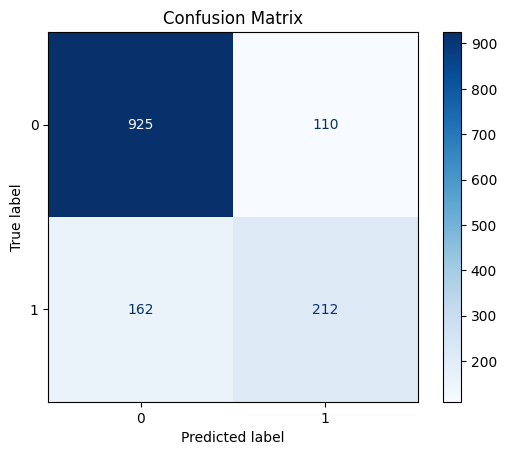

In [173]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap="Blues", values_format="d"
)
plt.title("Confusion Matrix")
plt.show()

In [174]:
df_test = X_test.copy()
df_test["Churn_Probability"] = y_prob
df_test["Prediction"] = y_pred

df_test["Category"] = df_test["Prediction"].map({1:"Likely to Churn", 0:"Likely to Stay"})
df_test.describe()
df_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Probability,Prediction,Category
437,0,72,114.05,8468.20,True,True,True,True,False,True,...,True,False,True,True,True,False,False,0.044365,0,Likely to Stay
2280,1,8,100.15,908.55,False,False,False,True,False,True,...,True,False,False,True,True,False,False,0.683600,1,Likely to Churn
2235,0,41,78.35,3211.20,False,True,True,True,False,True,...,False,True,False,True,True,False,False,0.056440,0,Likely to Stay
4460,0,18,78.20,1468.75,True,True,False,True,False,False,...,False,False,False,False,False,True,False,0.408306,0,Likely to Stay
3761,0,72,82.65,5919.35,False,True,False,True,False,True,...,True,False,True,True,True,False,False,0.021691,0,Likely to Stay


In [175]:
import numpy as np

stay_count = np.sum(y_pred == 0)
churn_count = np.sum(y_pred == 1)

print("Likely to stay customers:", stay_count)
print("Not likely to stay (Likely to churn) customers:", churn_count)


Likely to stay customers: 1087
Not likely to stay (Likely to churn) customers: 322


In [176]:
import joblib

joblib.dump(model, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully")


Model and scaler saved successfully


In [177]:
import joblib

joblib.dump(model, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "feature_names.pkl")

print("Model, scaler, and feature names saved")



Model, scaler, and feature names saved


the goal is to predict whether a user will purchase a product based on age and estimated salary


```
# This is formatted as code
```



In [178]:
import numpy as np
import pandas as pd


In [179]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Social_Network_Ads.csv'
dataset=pd.read_csv(path)
print("Dataset Preview")
print(dataset.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Preview
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [180]:
dataset.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [181]:
X=dataset.iloc[: ,2:4].values
y=dataset.iloc[: ,-1].values

In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [183]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [184]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(
    criterion='entropy',random_state=42,max_depth=4)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [185]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)




Accuracy: 0.9125
Confusion Matrix:
 [[47  5]
 [ 2 26]]


In [186]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9125


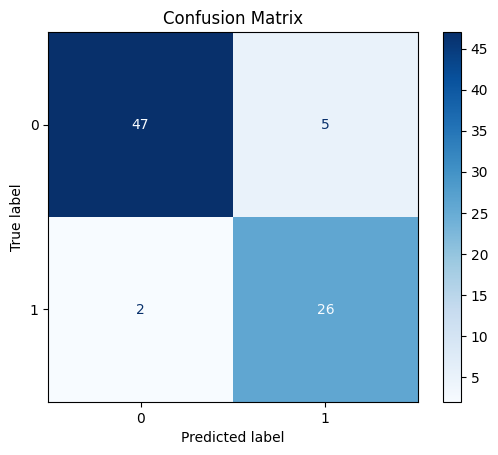

In [187]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap="Blues", values_format="d"
)
plt.title("Confusion Matrix")
plt.show()

In [188]:
TN, FP, FN, TP = cm.ravel()

print("Correctly identified churn customers (TP):", TP)
print("Misclassified non-churn customers (FP):", FP)
print("Missed churn customers (FN):", FN)
print("Correctly identified non-churn customers (TN):", TN)

Correctly identified churn customers (TP): 26
Misclassified non-churn customers (FP): 5
Missed churn customers (FN): 2
Correctly identified non-churn customers (TN): 47


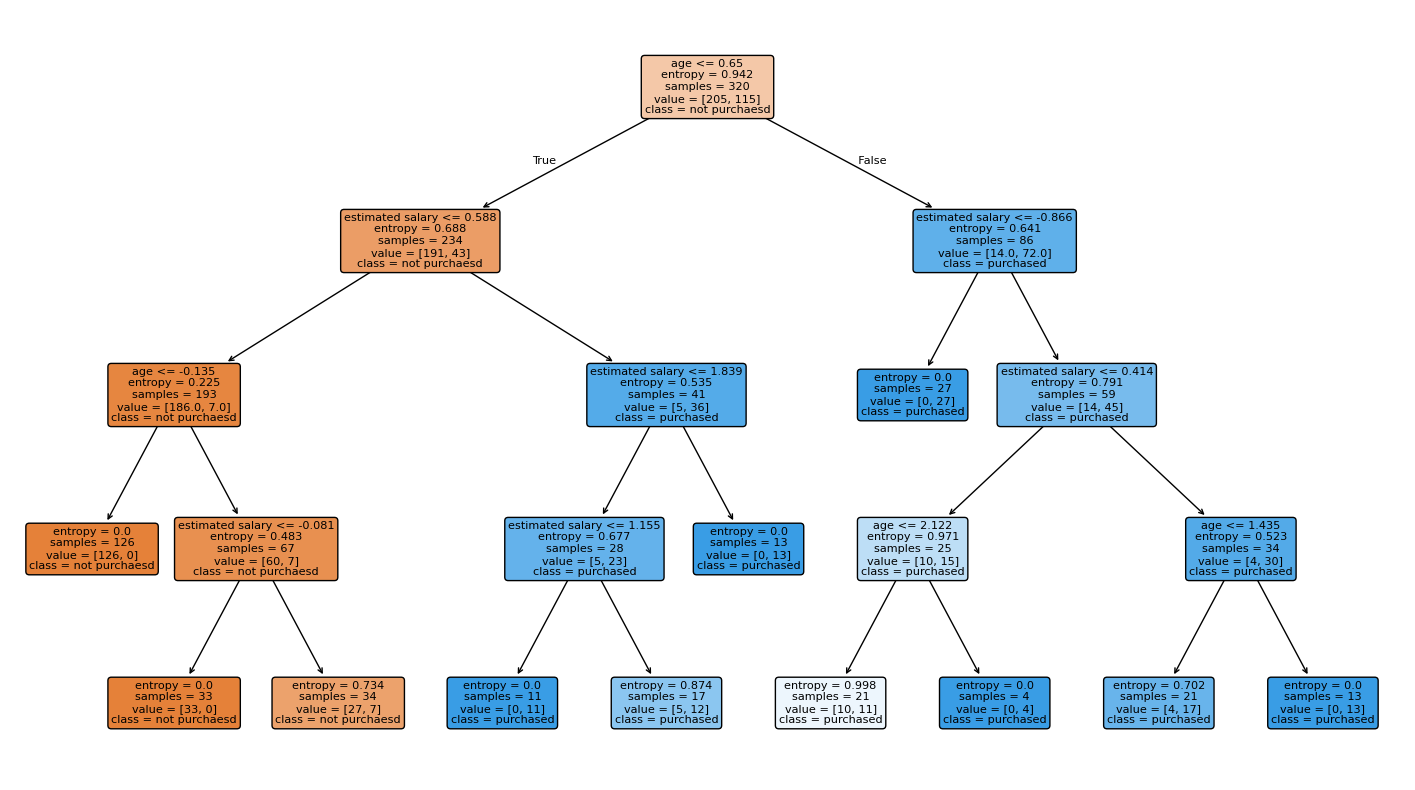

In [189]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plot_tree(
    classifier,feature_names=["age","estimated salary"],
    class_names=["not purchaesd","purchased"],
    filled=True,
    rounded=True
)
plt.show()

using ittanic passenger data, our goal is to predict whether a passenger survuved

In [190]:
import seaborn as sns
df=sns.load_dataset("titanic")
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [191]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [208]:
df=df[["survived","pclass","age","parch","fare","sex","embarked"]]
df.head()

,survived,pclass,age,parch,fare,sex,embarked
0,0,3,22.0,0,7.2500,1,2
1,1,1,38.0,0,71.2833,0,0
2,1,3,26.0,0,7.9250,0,2
3,1,1,35.0,0,53.1000,0,2
4,0,3,35.0,0,8.0500,1,2


In [206]:
X = df.drop("survived", axis=1)
y = df["survived"]


In [207]:
encoder=LabelEncoder()
df["sex"]=encoder.fit_transform(df["sex"])
df["embarked"]=encoder.fit_transform(df["embarked"])

df.head()

,survived,pclass,age,parch,fare,sex,embarked
0,0,3,22.0,0,7.2500,1,2
1,1,1,38.0,0,71.2833,0,0
2,1,3,26.0,0,7.9250,0,2
3,1,1,35.0,0,53.1000,0,2
4,0,3,35.0,0,8.0500,1,2


In [218]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="gini",
    random_state=42,
    max_depth=4
)

model.fit(X, y)



DecisionTreeClassifier(max_depth=4, random_state=42)

In [199]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9125


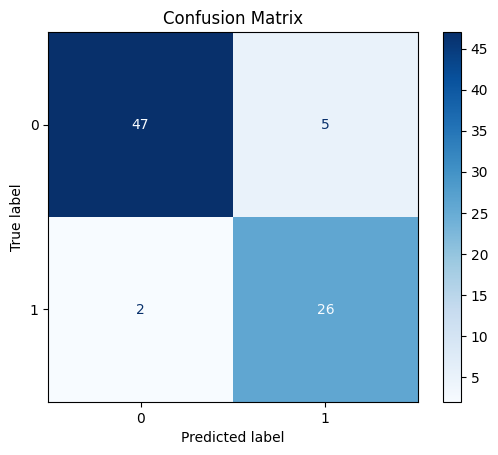

In [202]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap="Blues", values_format="d"
)
plt.title("Confusion Matrix")
plt.show()

In [201]:
TN, FP, FN, TP = cm.ravel()

print("Correctly identified churn customers (TP):", TP)
print("Misclassified non-churn customers (FP):", FP)
print("Missed churn customers (FN):", FN)
print("Correctly identified non-churn customers (TN):", TN)

Correctly identified churn customers (TP): 26
Misclassified non-churn customers (FP): 5
Missed churn customers (FN): 2
Correctly identified non-churn customers (TN): 47


In [212]:
X = df.drop("survived", axis=1)
y = df["survived"]

X = pd.get_dummies(X, drop_first=True)


In [214]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="gini",
    random_state=42,
    max_depth=4
)

model.fit(X, y)   # ← THIS is mandatory


DecisionTreeClassifier(max_depth=4, random_state=42)

In [215]:

new_passenger = pd.DataFrame(
    [[3, 25, 0, 7.25, 1, 2]],
    columns=X.columns
)

prediction = model.predict(new_passenger)
prediction

array([0])

In [216]:
if prediction[0]==1:
  print("passenger is likely to survive")
else:
  print("passenger is likely not to survive")

passenger is likely not to survive


In [217]:
print(X.dtypes)


pclass        int64
age         float64
parch         int64
fare        float64
sex           int64
embarked      int64
dtype: object


In [ ]:
1.load the dataset and understand customer attributes:
age
job
balance
loan status
contact history
2. identify input features that may influence whether a customer subscribes to a term deposit
3. build a model that can classify custoomers into:
likely to subscribe
 not likely to subscribe
 4



In [220]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/bank_marketing_dataset.csv'
df=pd.read_csv(path)
print("Dataset Preview")
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Preview
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673 

In [221]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [222]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [223]:
df.info()
df.describe()
df['job'].value_counts()
df['deposit'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


,count
deposit,
no,5873
yes,5289


In [224]:
X = df.drop('deposit', axis=1)
y = df['deposit']


In [225]:
y = y.map({'yes': 1, 'no': 0})


In [226]:
X = pd.get_dummies(X, drop_first=True)


In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [240]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [241]:
y_pred = model.predict(X_test)



In [242]:
new_customer = X.iloc[[0]]  # example
model.predict(new_customer)


array([1])

In [243]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


Accuracy: 0.8110165696372593
[[975 191]
 [231 836]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1166
           1       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



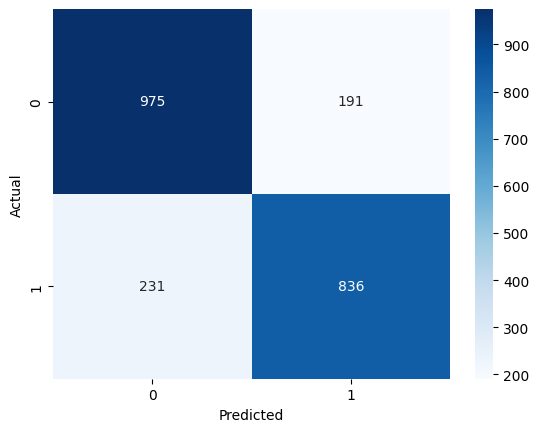

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [245]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

importances = pd.Series(tree.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)


,0
duration,0.659091
poutcome_success,0.166249
contact_unknown,0.129695
month_mar,0.035468
month_oct,0.005743
balance,0.002455
day,0.001299
age,0.000000
campaign,0.000000
pdays,0.000000


In [246]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [247]:
import pandas as pd

feature_importance = pd.Series(
    tree_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


,0
duration,0.659091
poutcome_success,0.166249
contact_unknown,0.129695
month_mar,0.035468
month_oct,0.005743
balance,0.002455
day,0.001299
age,0.000000
campaign,0.000000
pdays,0.000000


In [248]:
top_feature = feature_importance.idxmax()
top_feature


'duration'

In [249]:
deep_tree = DecisionTreeClassifier(
    max_depth=None,
    random_state=42
)
deep_tree.fit(X_train, y_train)

deep_train_acc = deep_tree.score(X_train, y_train)
deep_test_acc = deep_tree.score(X_test, y_test)

deep_train_acc, deep_test_acc


(1.0, 0.7895208240035826)

In [250]:
shallow_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
shallow_tree.fit(X_train, y_train)

shallow_tree.score(X_train, y_train), shallow_tree.score(X_test, y_test)


(0.7816104826968305, 0.7693685624720108)

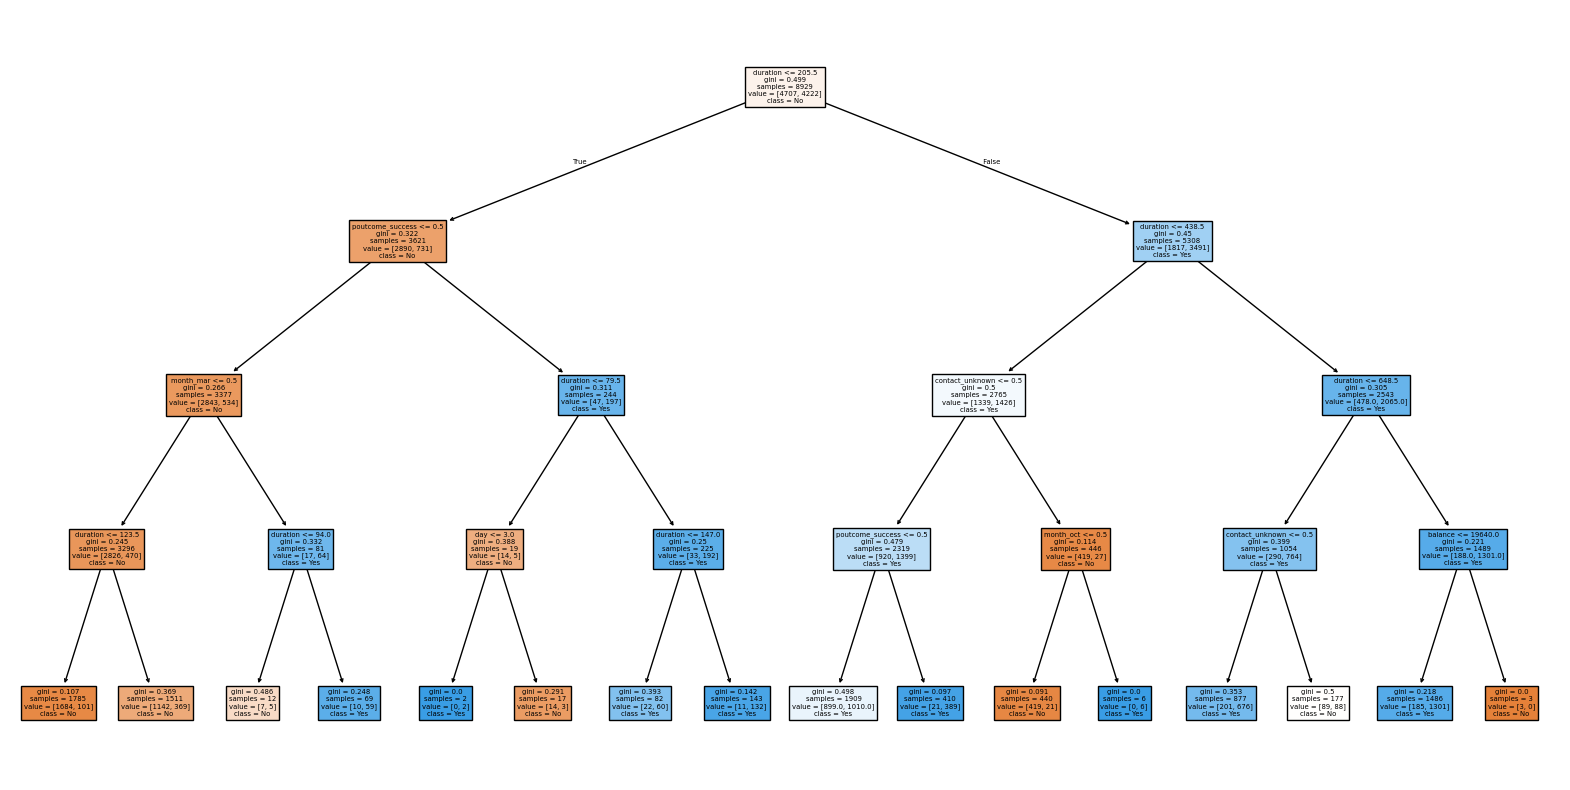

In [251]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True
)
plt.show()


RANDOM FOREST


In [252]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Social_Network_Ads.csv'
df=pd.read_csv(path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [253]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [254]:
X=df.iloc[: ,2:4].values
y=df.iloc[: ,-1].values

In [267]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [260]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [261]:
y_pred=classifier.predict(x_test)


In [262]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9125


<Axes: >

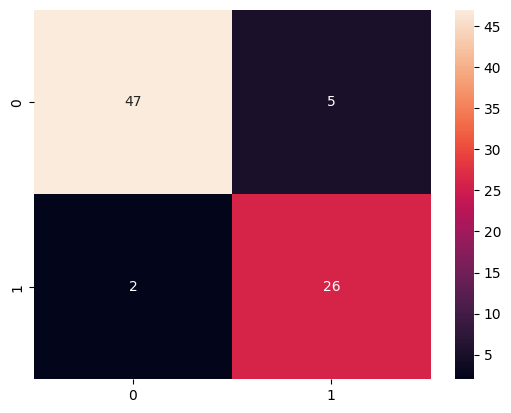

In [264]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

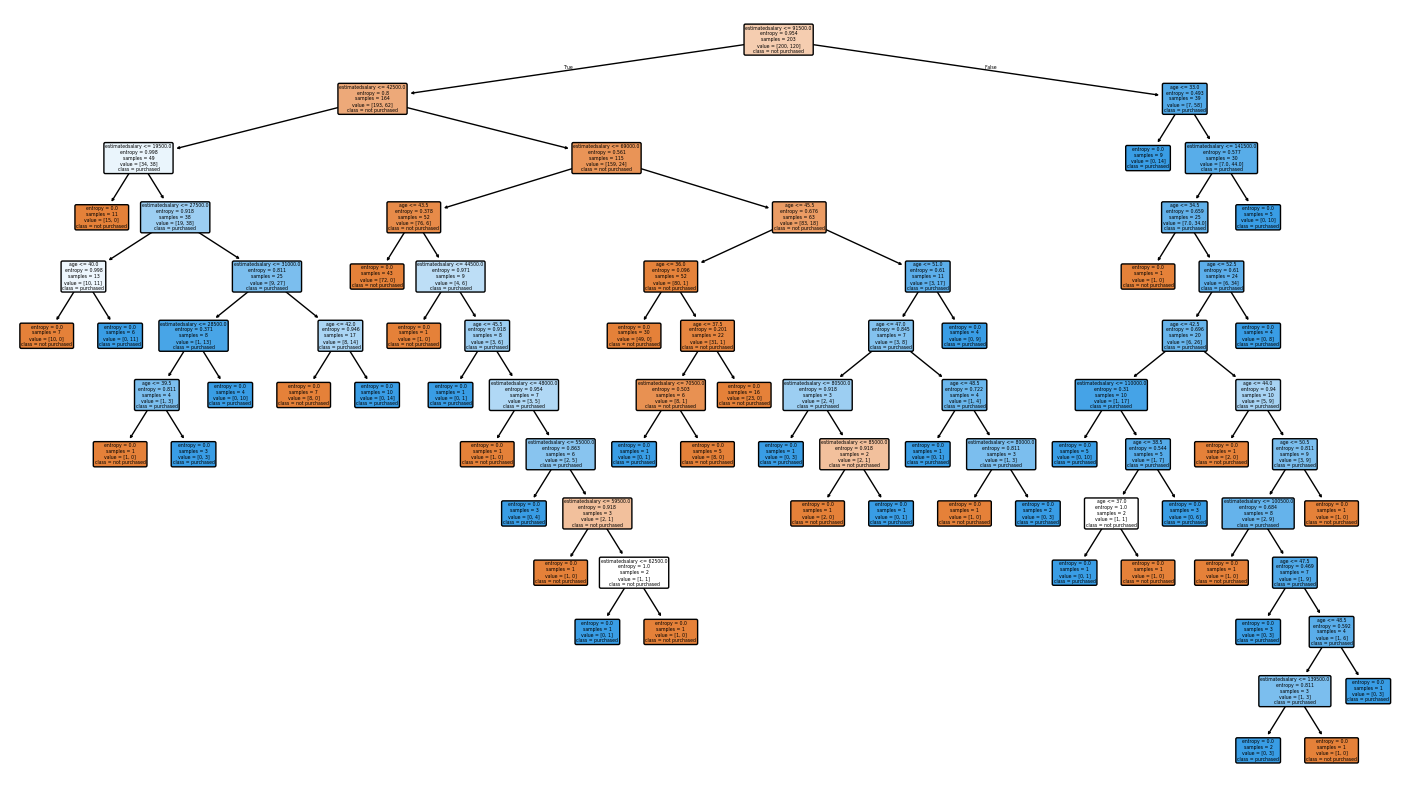

In [266]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
single_tree=classifier.estimators_[0]
plt.figure(figsize=(18,10))
plot_tree(
    single_tree,
    feature_names=["age","estimatedsalary"],
    class_names=["not purchased","purchased"],
    filled=True,
    rounded=True
)
plt.show()

CREDIT CARD FRAUD DETECTION BUSINESS

In [268]:
import numpy as np
import pandas as pd
import seaborn as sns


In [269]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [270]:
df.isna().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [271]:
df=df.dropna()

In [272]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [273]:
x=df.drop('Class',axis=1)
y=df['Class']

In [274]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [276]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [277]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=4)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=10)

In [284]:
y_pred=classifier.predict(x_test)
print("Predictions:",y_pred)

Predictions: [0. 0. 0. ... 0. 0. 0.]


In [285]:
from sklearn.metrics import accuracy_score, classification_report
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9991638795986622


In [280]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2379
         1.0       1.00      0.85      0.92        13

    accuracy                           1.00      2392
   macro avg       1.00      0.92      0.96      2392
weighted avg       1.00      1.00      1.00      2392



In [286]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

Confusion Matrix:
 [[2379    0]
 [   2   11]]


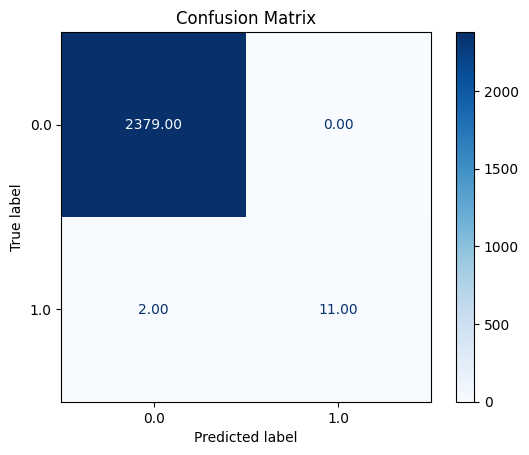

In [287]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Blues",values_format=".2f")
plt.title("Confusion Matrix")
plt.show()